In [29]:
import numpy as np
import matplotlib.pyplot as plt

import random

from PIL import Image

from tensorflow.keras.losses import MSE

In [30]:
panda = Image.open("../datasets/me.jpg")

In [31]:
small = panda.resize((60, 60))

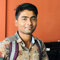

In [32]:
small

In [33]:
type(small)

PIL.Image.Image

In [34]:
np.array(small).shape

(60, 60, 3)

In [35]:
img = np.array(small).mean(axis=2)

In [36]:
img.shape

(60, 60)

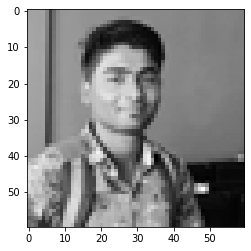

In [37]:
plt.imshow(img, cmap="gray")


In [38]:
orignal = img.flatten()


In [39]:
orignal.shape

(3600,)

In [40]:
population = np.random.randint(0, 255, (1000, orignal.shape[0]))

In [41]:
population.shape

(1000, 3600)

In [42]:
orignal.shape,population.shape

((3600,), (1000, 3600))

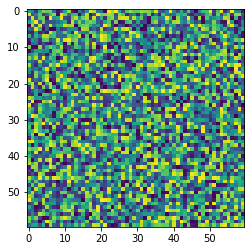

In [43]:
plt.imshow(population[0].reshape(*img.shape))

In [54]:
errors = MSE(orignal, population).numpy()
indices = errors.argsort()
fit = population[indices[:10]]
first = fit[np.random.randint(0, 10, 1000)]
second = fit[np.random.randint(0, 10, 1000)]
data = np.stack([first,second], axis=2)
first_selector = np.random.randint(0, 2, population.shape)
second_selector = 1 - first_selector
selector = np.stack([first_selector, second_selector], axis=2)
mutation = np.random.randn(*population.shape)


In [55]:
data * selector

array([[[119,   0],
        [  0, 236],
        [ 59,   0],
        ...,
        [139,   0],
        [  0,   3],
        [  0,  32]],

       [[  0,  76],
        [ 33,   0],
        [224,   0],
        ...,
        [205,   0],
        [  0,  37],
        [  0,  42]],

       [[128,   0],
        [ 60,   0],
        [  0,  34],
        ...,
        [ 57,   0],
        [174,   0],
        [155,   0]],

       ...,

       [[  0, 241],
        [  0, 240],
        [  0,   6],
        ...,
        [  0, 105],
        [  0, 203],
        [  0, 122]],

       [[  0, 241],
        [  0, 240],
        [ 59,   0],
        ...,
        [  0, 105],
        [  3,   0],
        [  0, 122]],

       [[  0, 179],
        [  0,  46],
        [142,   0],
        ...,
        [134,   0],
        [145,   0],
        [254,   0]]])

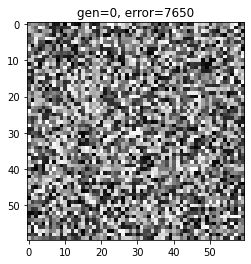

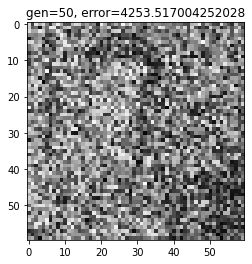

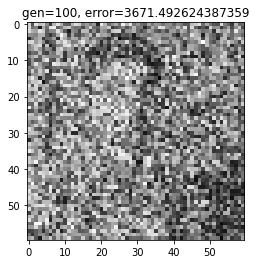

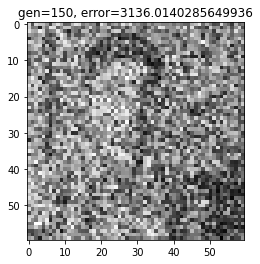

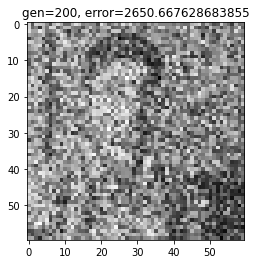

KeyboardInterrupt: 

In [19]:
for generation in range(1000):
    errors = MSE(orignal, population).numpy()
    indices = errors.argsort()
    fit = population[indices[:10]]

    first = fit[np.random.randint(0, 10, 1000)]
    second = fit[np.random.randint(0, 10, 1000)]
    data = np.stack([first,second], axis=2)

    first_selector = np.random.randint(0, 2, population.shape)
    second_selector = 1 - first_selector
    selector = np.stack([first_selector, second_selector], axis=2)

    mutation = np.random.randn(*population.shape)
    population = (data * selector).sum(axis=2) + mutation
    
    if generation % 50 == 0:
        plt.figure()
        plt.title("gen={}, error={}".format(generation, str(errors[indices[0]])))
        plt.imshow(population[0].reshape(*img.shape), cmap="gray")
        plt.show()